## Import dependencies

In [1]:
import tensorflow_hub as hub
import tensorflow as tf
from matplotlib import pyplot as plt
import numpy as np
import cv2

## Load Pretrained model

In [2]:
model = hub.load('https://tfhub.dev/google/magenta/arbitrary-image-stylization-v1-256/2')

## Preprocessing image and load

In [3]:
def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_image(img,channels=3)
    img = tf.image.convert_image_dtype(img,tf.float32)
    img = img[tf.newaxis,:]
    return img

## Visualize Image

In [4]:
content_image = load_image('1.jpg')
style_image = load_image('dali.jpeg')

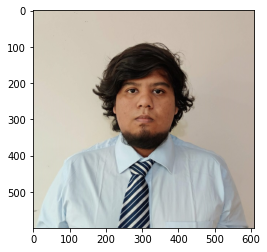

In [5]:
plt.imshow(np.squeeze(content_image))
plt.show()


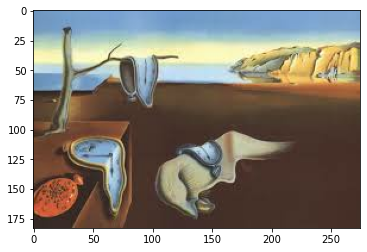

In [6]:
plt.imshow(np.squeeze(style_image))
plt.show()

## Style Image

In [7]:
stylized_image = model(tf.constant(content_image),tf.constant(style_image))[0]

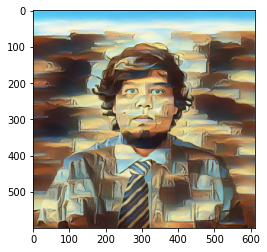

In [8]:
plt.imshow(np.squeeze(stylized_image))
plt.show()

In [9]:
cv2.imwrite('generated.jpg', cv2.cvtColor(np.squeeze(stylized_image)*255, cv2.COLOR_BGR2RGB))

True